Hierarchical Clustering

In [ ]:
# 1. Setup: Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler

In [ ]:
# 2. Load and Prepare the Dataset
# For this exercise, we'll use the classic Iris dataset.
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Optional: Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


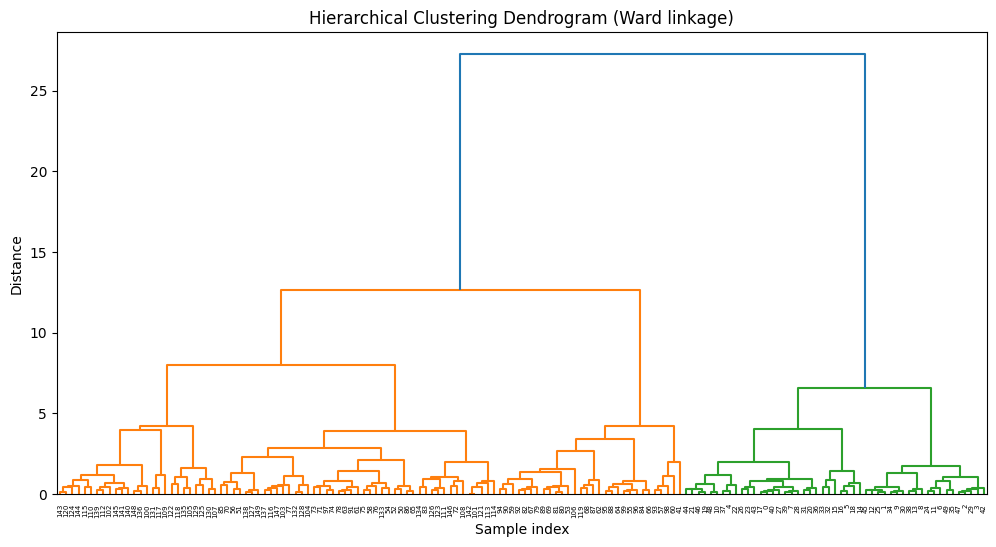

In [ ]:
# 3. Compute Linkage Matrix & Plot Dendrogram
# Compute the linkage matrix using Ward's method
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


In [ ]:
# 4. Choose Number of Clusters & Assign Labels
#Let’s say we want to create 3 clusters:
num_clusters = 3
labels = fcluster(linked, num_clusters, criterion='maxclust')
df['cluster'] = labels
print(df['cluster'].value_counts())

cluster
3    71
1    49
2    30
Name: count, dtype: int64


In [ ]:
# 4. Choose Number of Clusters & Assign Labels
#Let’s say we want to create 3 clusters:
num_clusters = 2
labels = fcluster(linked, num_clusters, criterion='maxclust')
df['cluster'] = labels
print(df['cluster'].value_counts())

cluster
2    101
1     49
Name: count, dtype: int64


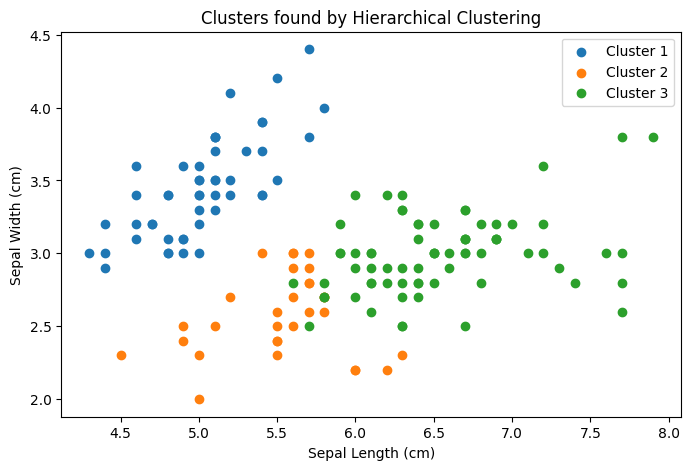

In [ ]:
# 5. Visualize the Clusters
# We'll use the first two features for a quick cluster plot:
plt.figure(figsize=(8, 5))
for cluster in range(1, num_clusters+1):
    plt.scatter(df[df['cluster']==cluster]['sepal length (cm)'],
                df[df['cluster']==cluster]['sepal width (cm)'],
                label=f'Cluster {cluster}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters found by Hierarchical Clustering')
plt.legend()
plt.show()


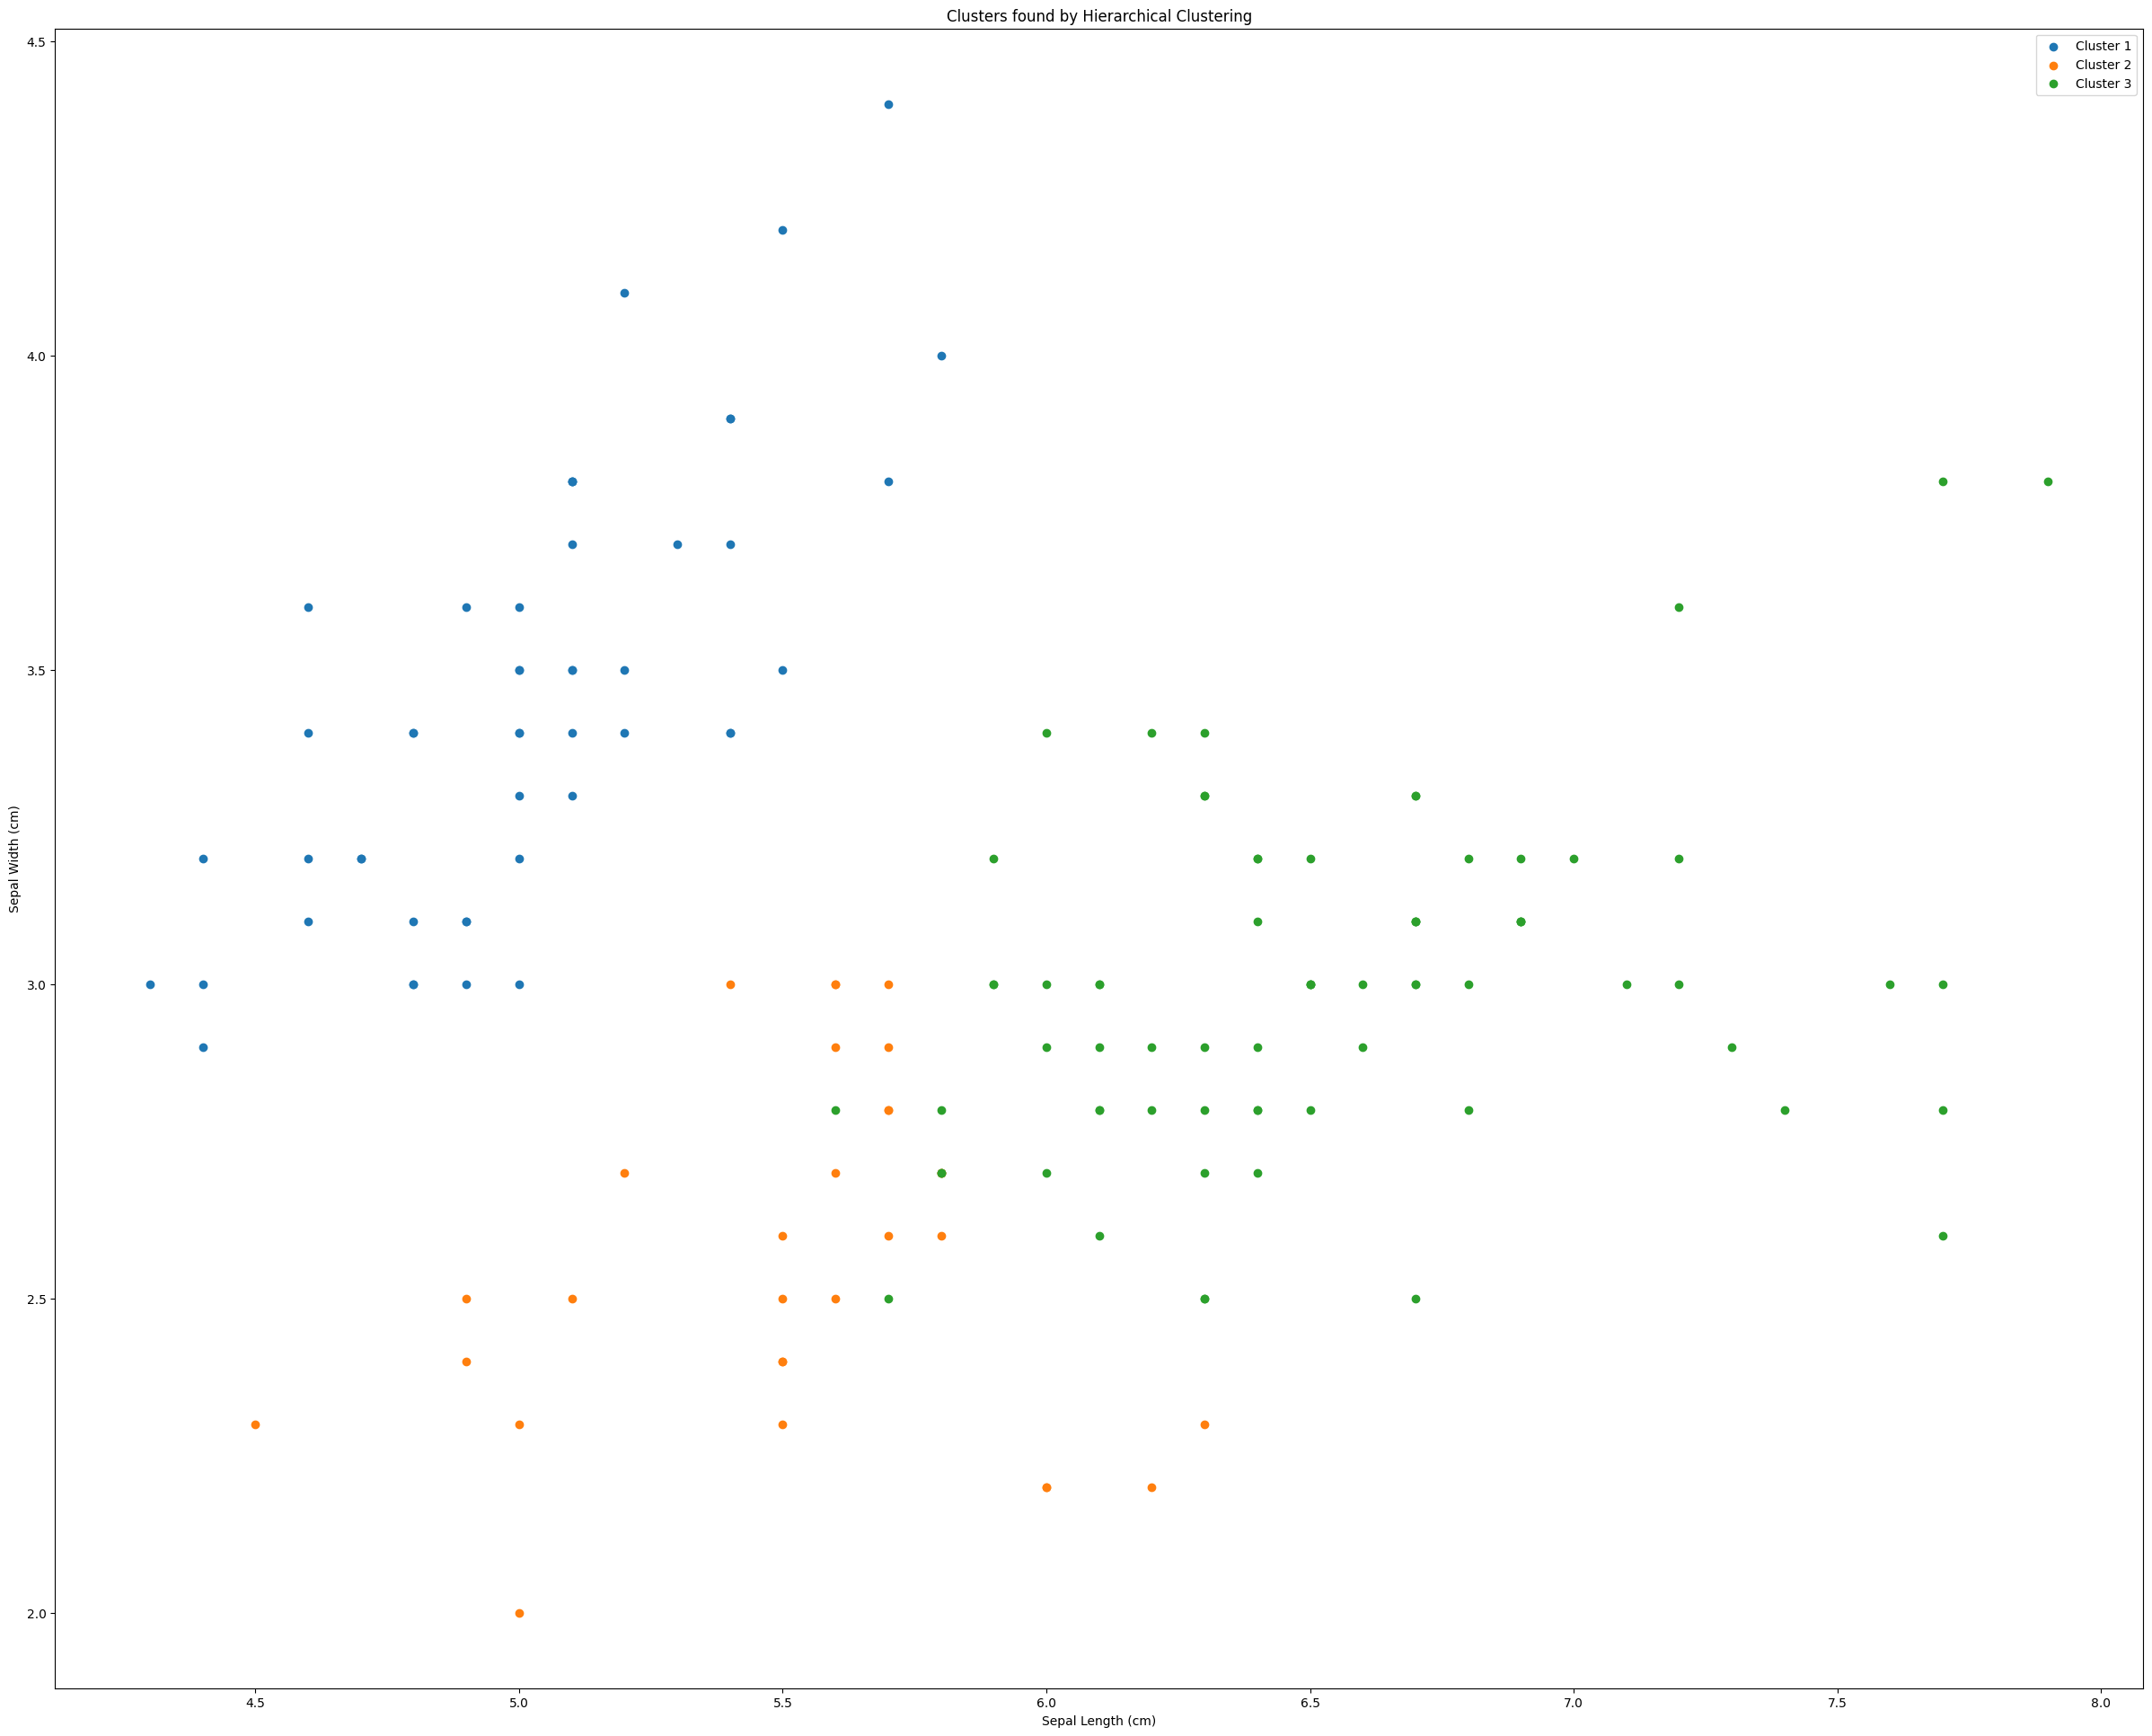

In [ ]:
# 5. Visualize the Clusters
# We'll use the first two features for a quick cluster plot:
plt.figure(figsize=(30,24))
for cluster in range(1, num_clusters+1):
    plt.scatter(df[df['cluster']==cluster]['sepal length (cm)'],
                df[df['cluster']==cluster]['sepal width (cm)'],
                label=f'Cluster {cluster}')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Clusters found by Hierarchical Clustering')
plt.legend()
plt.show()


Apriori

In [ ]:
# 1.Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Load dataset directly from URL
url = 'https://raw.githubusercontent.com/dphi-official/Datasets/master/Mall_Customers.csv'
df = pd.read_csv(url)

# Display basic info
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [ ]:
# 2. Select Features for Clustering
# Use 'Annual Income (k$)' and 'Spending Score (1-100)' for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [ ]:
# 3. Preprocess Data with Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

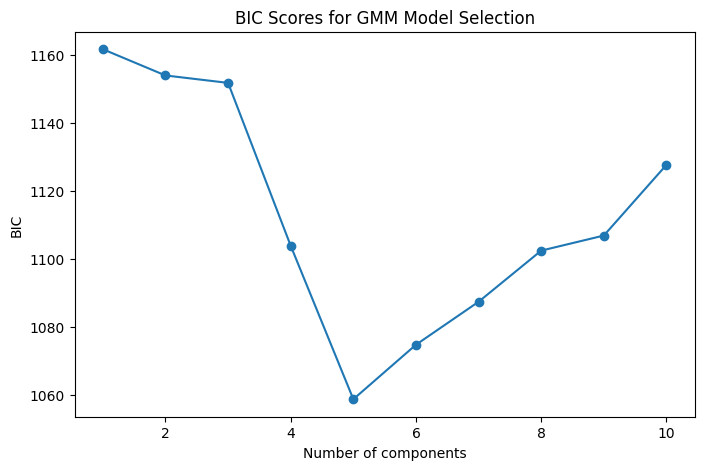

In [ ]:
# 4. Find Optimal Number of Gaussian Components Using BIC
n_components = np.arange(1, 11)
bics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_scaled)
    bics.append(gmm.bic(X_scaled))

plt.figure(figsize=(8,5))
plt.plot(n_components, bics, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC Scores for GMM Model Selection')
plt.show()

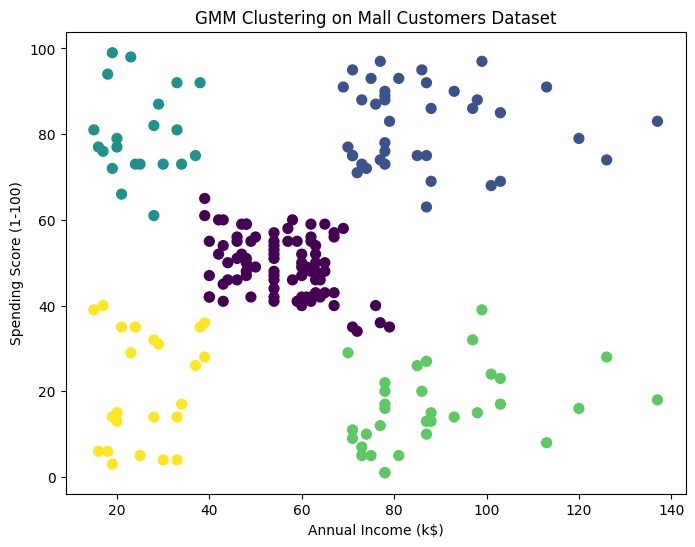

In [ ]:
# 5. Fit GMM and Visualize Clusters
# Suppose the lowest BIC is for 5 components
optimal_clusters = 5
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering on Mall Customers Dataset')
plt.show()

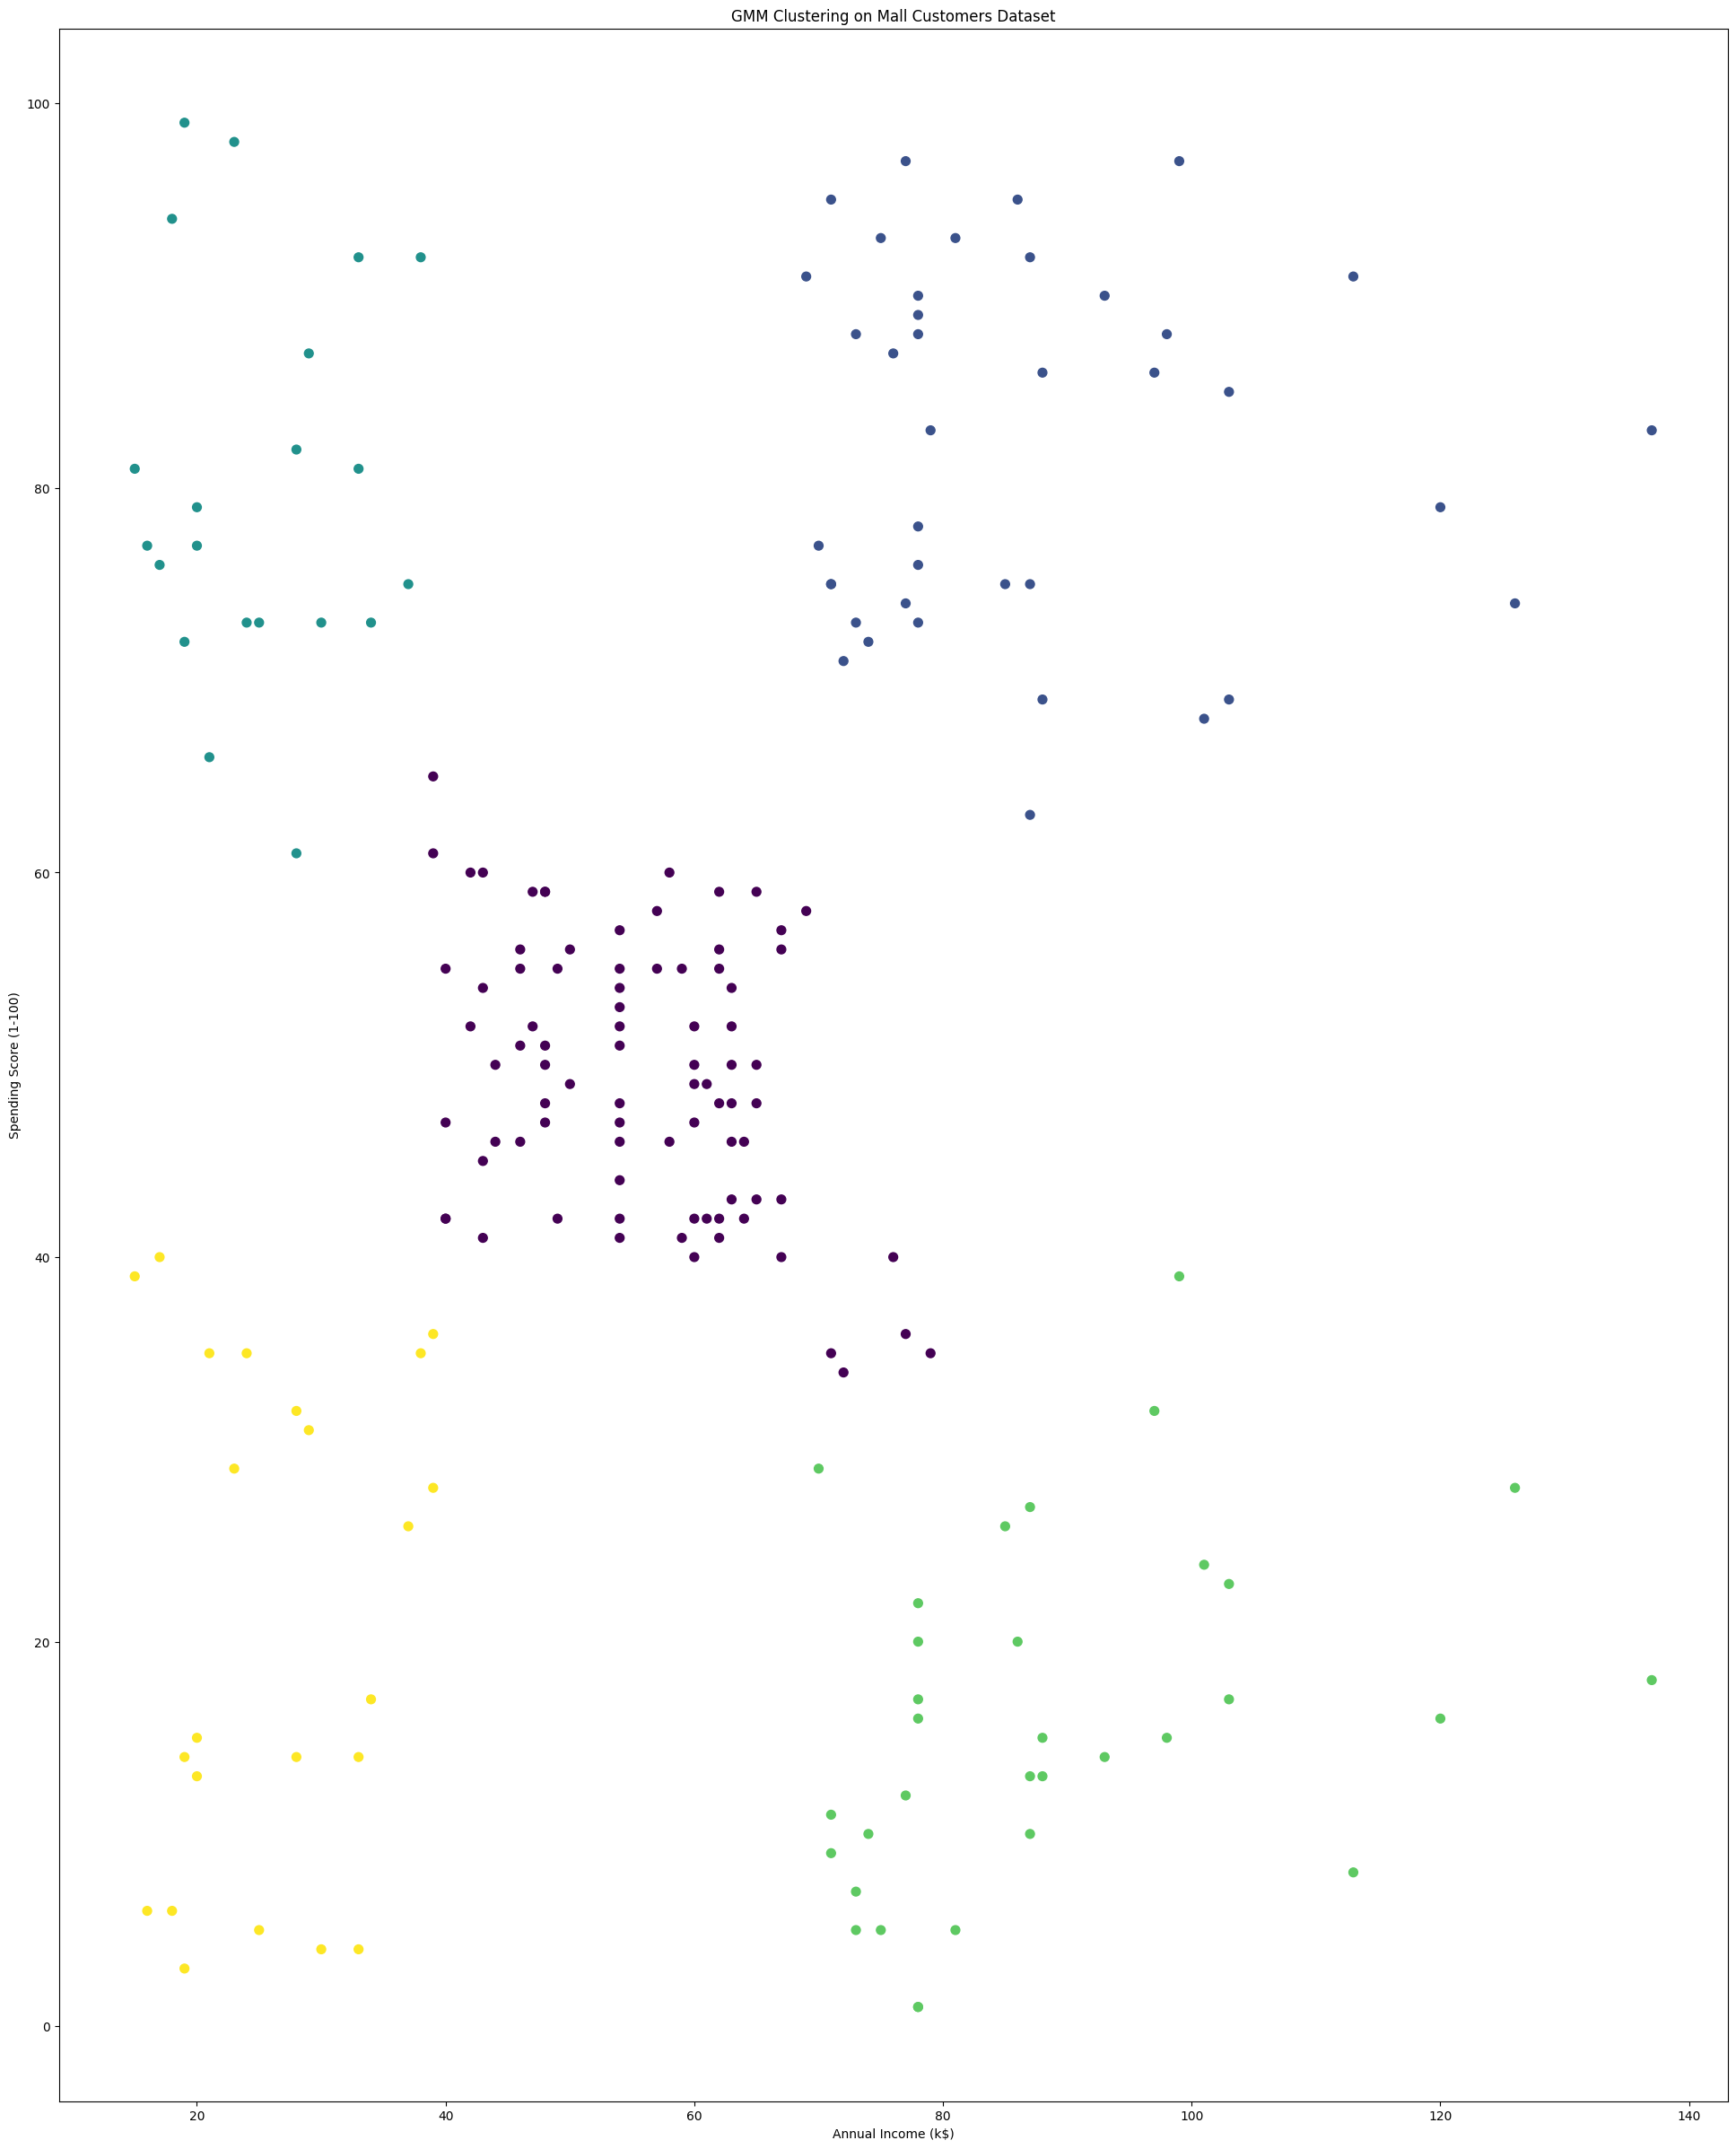

In [ ]:
# 5. Fit GMM and Visualize Clusters
# Suppose the lowest BIC is for 5 components
optimal_clusters = 5
gmm = GaussianMixture(n_components=optimal_clusters, random_state=42)
labels = gmm.fit_predict(X_scaled)

plt.figure(figsize=(24,30))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('GMM Clustering on Mall Customers Dataset')
plt.show()